In [ ]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving AWG_Solution.csv to AWG_Solution (1).csv


In [ ]:
df=pd.read_csv('AWG_Solution.csv', sep=',')
df.head()

,Temperature,Humidity,Water Production_Day,Avg_Number of People
0,23.9,88.7,3417.8,1709
1,23.6,91.1,3488.0,1744
2,23.5,88.6,3330.1,1665
3,22.3,81.2,3066.2,1533
4,21.3,70.6,2399.5,1200


In [ ]:
df['Avg_Number of Houses']=df['Water Production_Day']/10
df.head()

,Temperature,Humidity,Water Production_Day,Avg_Number of People,Avg_Number of Houses
0,23.9,88.7,3417.8,1709,341.78
1,23.6,91.1,3488.0,1744,348.80
2,23.5,88.6,3330.1,1665,333.01
3,22.3,81.2,3066.2,1533,306.62
4,21.3,70.6,2399.5,1200,239.95


In [ ]:
df['Avg_Number of Houses'].dtypes

dtype('float64')

In [ ]:
df['Avg_Number of Houses'] = df['Avg_Number of Houses'].astype(int)
print(df['Avg_Number of Houses'])
print(df['Avg_Number of Houses'].dtypes)

In [ ]:
df.head()

,Temperature,Humidity,Water Production_Day,Avg_Number of People,Avg_Number of Houses
0,23.9,88.7,3417.8,1709,341
1,23.6,91.1,3488.0,1744,348
2,23.5,88.6,3330.1,1665,333
3,22.3,81.2,3066.2,1533,306
4,21.3,70.6,2399.5,1200,239


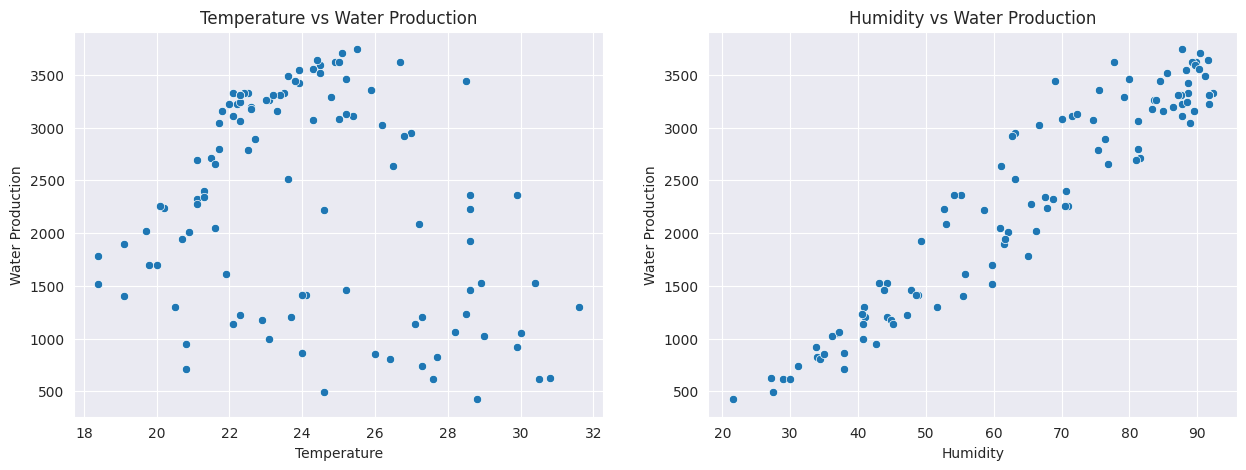

In [ ]:
#Plot scatterplot
sns.set_style('darkgrid')

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='Temperature', y='Water Production_Day', ax=ax1, data=df)
sns.scatterplot(x='Humidity', y='Water Production_Day', ax=ax2, data=df)

ax1.set_title('Temperature vs Water Production')
ax2.set_title('Humidity vs Water Production')

ax1.set_xlabel('Temperature')
ax1.set_ylabel('Water Production')

ax2.set_xlabel('Humidity')
ax2.set_ylabel('Water Production')
plt.show()


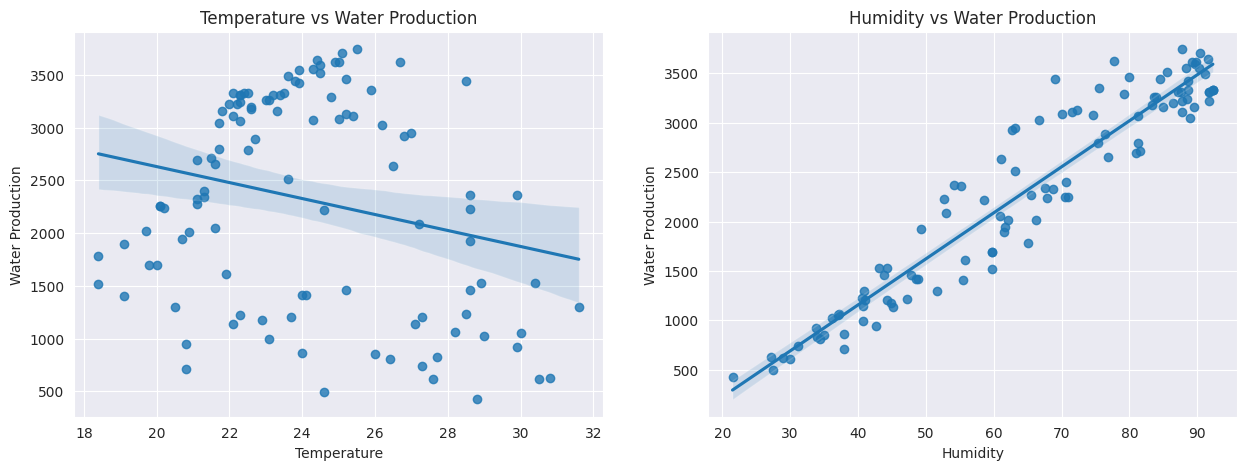

In [ ]:
#Plot regression plot
sns.set_style('darkgrid')

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))

sns.regplot(x='Temperature', y='Water Production_Day', ax=ax1, data=df)
sns.regplot(x='Humidity', y='Water Production_Day', ax=ax2, data=df)

ax1.set_title('Temperature vs Water Production')
ax2.set_title('Humidity vs Water Production')

ax1.set_xlabel('Temperature')
ax1.set_ylabel('Water Production')

ax2.set_xlabel('Humidity')
ax2.set_ylabel('Water Production')
plt.show()


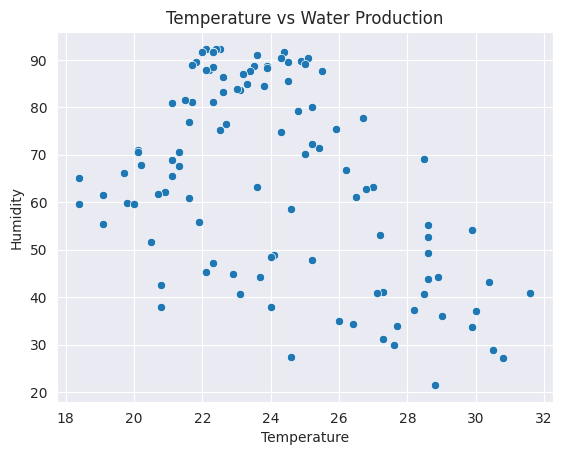

In [ ]:
#Plot scatterplot
sns.set_style('darkgrid')

sns.scatterplot(x='Temperature', y='Humidity', data=df)

plt.title('Temperature vs Water Production')

plt.xlabel('Temperature')
plt.ylabel('Humidity')

plt.show()

In [ ]:
#Using Humidity to pridict Water Production

x=df[['Humidity']]
y=df['Water Production_Day']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)


In [ ]:
#fit model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#prediction
water_production_pred=model.predict(x_test)
print(water_production_pred)

[2308.82855396 1857.35855664 2566.81140958 2755.69171458 2543.77722604
  576.65795197 1691.51243517 1350.60651882 2792.54640824 2999.85406007
 1028.1279493  1396.67488589 3400.64885362  926.77754174 1488.81162004
  567.44427856 1184.76039735 2437.81998177 2202.87130969 2175.23028945
 3451.3240574  3566.49497509]


In [ ]:
# Evaluate
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, water_production_pred))
print("MSE:", mean_squared_error(y_test, water_production_pred))


Model Coefficients: [46.06836707]
Intercept: -685.6153058597224
R² Score: 0.8900040870063437
MSE: 113191.46091447544


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.91813051, 0.88534338, 0.76403996, 0.92329598, 0.87371995])

In [ ]:
#fit model
model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
#prediction
water_production_pred=model.predict(x_test)
print(water_production_pred)

[2286.686      1570.784      2365.227      2830.957      2377.458
  629.693      2173.582      1271.882      2835.826      3079.884
  931.69       1214.119      3291.27966667  839.786      1470.754
  629.693      1065.755      2456.346      2728.16       2074.665
 3502.549      3322.758     ]


In [ ]:
#Evaluate
print("R² Score:", r2_score(y_test, water_production_pred))
print("MSE:", mean_squared_error(y_test, water_production_pred))

R² Score: 0.8703129622142256
MSE: 133454.6427146723


In [ ]:
#Using Humidity and Temperature to pridict Water Production

x=df[['Humidity', 'Temperature']]
y=df['Water Production_Day']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
#fite
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#prediction
water_production_pred=model.predict(x_test)
print(water_production_pred)

[1828.31894601 2166.74038997 2360.72893496 2823.43513911 2642.38311626
  388.18355612 1305.96792632 1619.5469915  2998.08761193 3173.93837256
 1197.25259726 1106.12951956 3518.35125563  899.89156276 1226.78506077
  893.32023514 1399.04095794 2123.62696004 2407.16238422 1885.3610528
 3658.71662443 3555.92402345]


In [ ]:
#Evaluate
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, water_production_pred))
print("MSE:", mean_squared_error(y_test, water_production_pred))


Model Coefficients: [52.01262216 83.15148443]
Intercept: -3082.4888080627957
R² Score: 0.9557602140838568
MSE: 45525.01872211096


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.96570862, 0.94176996, 0.9349316 , 0.98106729, 0.93848702])